# CNN文本分类实战
1、文本数据预处理，必须都是相同长度，相同向量维度\
2、构建卷积模型，注意卷积核大小的设计\
3、将卷积后的特征图池化成一个特征\
4、将多种特征拼接在一起，准备完成分类任务

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_features = 3000
sequence_length = 300
embedding_dimension = 100
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_features)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [2]:
print(len(x_train[3]))
x_train[0][:10]

550


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [3]:
x_train = pad_sequences(x_train, maxlen=sequence_length)
x_test = pad_sequences(x_test, maxlen=sequence_length)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 300)
(25000, 300)
(25000,)
(25000,)


In [4]:
x_train[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [5]:
# 多种卷积核，相当于单词数
filter_sizes = [3, 4, 5]
def convolution():
    inn = layers.Input(shape=(sequence_length, embedding_dimension, 1))     # 输入是3维的
    cnns = []
    for size in filter_sizes:
        conv = layers.Conv2D(filters=64, kernel_size=(size, embedding_dimension),
                             strides=1, padding='valid', activation='relu')(inn)
        
        # 需要将多种卷积后的特征图池化成一个特征,300-3
        pool = layers.MaxPool2D(pool_size=(sequence_length-size+1, 1), padding='valid')(conv)
        cnns.append(pool)
        
    # 将得到的特征拼接在一起
    outt = layers.concatenate(cnns)
    
    model = keras.Model(inputs=inn, outputs=outt)
    return model

def cnn_mulfilter():
    model = keras.Sequential([
        layers.Embedding(input_dim=num_features, output_dim=embedding_dimension,
                         input_length=sequence_length),
        # 先转成3维的
        layers.Reshape((sequence_length, embedding_dimension, 1)),
        convolution(),
        layers.Flatten(),
        layers.Dense(10, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
    return model

model = cnn_mulfilter()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          300000    
                                                                 
 reshape (Reshape)           (None, 300, 100, 1)       0         
                                                                 
 model (Functional)          (None, 1, 1, 192)         76992     
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 10)                1930      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [6]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 64s 179ms/step - loss: 0.4795 - accuracy: 0.7589 - val_loss: 0.3222 - val_accuracy: 0.8688
Epoch 2/10
352/352 [==============================] - 64s 181ms/step - loss: 0.2937 - accuracy: 0.8950 - val_loss: 0.2784 - val_accuracy: 0.8908
Epoch 3/10
352/352 [==============================] - 65s 184ms/step - loss: 0.2243 - accuracy: 0.9297 - val_loss: 0.2717 - val_accuracy: 0.8904
Epoch 4/10
352/352 [==============================] - 67s 191ms/step - loss: 0.1642 - accuracy: 0.9536 - val_loss: 0.2979 - val_accuracy: 0.8880
Epoch 5/10
352/352 [==============================] - 67s 190ms/step - loss: 0.1138 - accuracy: 0.9742 - val_loss: 0.3241 - val_accuracy: 0.8852
Epoch 6/10
352/352 [==============================] - 67s 189ms/step - loss: 0.0753 - accuracy: 0.9876 - val_loss: 0.3782 - val_accuracy: 0.8928
Epoch 7/10
352/352 [==============================] - 67s 190ms/step - loss: 0.0544 - accuracy: 0.9918 - val_loss: 0.4102 - val_ac

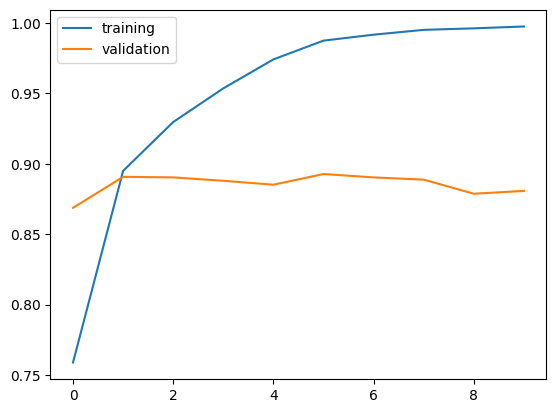

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [8]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 13s 17ms/step - loss: 0.6044 - accuracy: 0.8797


[0.6044411659240723, 0.8796799778938293]